<a href="https://colab.research.google.com/github/MigueXYLO/python/blob/main/03_MLP_02_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [6]:
train_images.ndim

3

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
print(train_images.dtype)

uint8


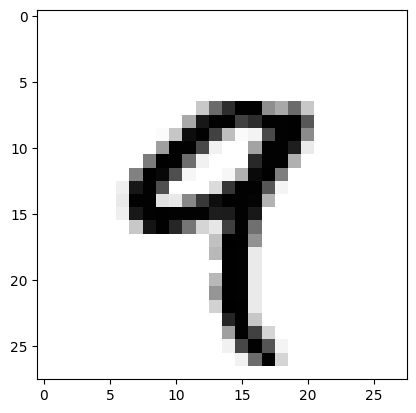

In [9]:
digit = train_images[4]
import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [10]:
for row in digit:
  for elem in row:
    print("%3d" % (elem), end=" ")
  print()

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 253 168   0   0   0 

In [11]:
# Defining the model
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [12]:
#Compile the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [13]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

In [14]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [20]:
# Training the model on the dataset
model.fit(train_images, train_labels, epochs=150, batch_size=64)

Epoch 1/150
938/938 [==============================] - 12s 13ms/step - loss: 8.4487e-04 - accuracy: 0.9997
Epoch 2/150
938/938 [==============================] - 11s 12ms/step - loss: 2.1609e-04 - accuracy: 1.0000
Epoch 3/150
938/938 [==============================] - 12s 12ms/step - loss: 1.4505e-04 - accuracy: 0.9999
Epoch 4/150
938/938 [==============================] - 12s 13ms/step - loss: 7.2372e-05 - accuracy: 1.0000
Epoch 5/150
938/938 [==============================] - 12s 13ms/step - loss: 4.0888e-06 - accuracy: 1.0000
Epoch 6/150
938/938 [==============================] - 12s 13ms/step - loss: 3.0687e-06 - accuracy: 1.0000
Epoch 7/150
938/938 [==============================] - 12s 13ms/step - loss: 2.6945e-06 - accuracy: 1.0000
Epoch 8/150
938/938 [==============================] - 10s 11ms/step - loss: 2.4397e-06 - accuracy: 1.0000
Epoch 9/150
938/938 [==============================] - 11s 12ms/step - loss: 2.2460e-06 - accuracy: 1.0000
Epoch 10/150
938/938 [===============

In [21]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.1061 - accuracy: 0.9863
test_acc: 0.986299991607666


In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
model.save('/content/drive/MyDrive/models/MNIST_MLP.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
